# <span style='background :#93B7BE' >&#9935; &#9923;<u> Data mining final project remove vs replace missing analisis</u> </span>
#### <span style='background :#F1FFFA' ><u>Author's:</u> <font color=#454545>   Belochitsky Oleg , Alfi Tal , Friza Ziv</font></span>
#### <span style='background :#F1FFFA' ><u>IDs:</u><font color=#454545>   321192577, 204557052, 312196355</font></span>

### &#10133;  <font color=#785964> Imports:</font>   

In [1]:
import pandas as pd
import numpy as np
import math

# matplotlib is for basic plotting.

import matplotlib
import matplotlib.pyplot as plt

# Seaborn is for statistical visualization.

import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 

### <font color=#785964> Loading datasets:</font>  

In [2]:
missing_values = pd.read_csv('test_log/missing_values_test.csv')

for this expirement we run all classifyers on test and train with same conditions 
all expirement done when:
   * number of bins is 10
   * bining strategy is equal_width
   * tolorance is 5
   * k is 5
   * train is 80% of train and test is 20% of train

The only change will be is the way we deal with missing values - removing or replacing with most cummont.  
We test it on all classifyers and will see if how its affect the essurments

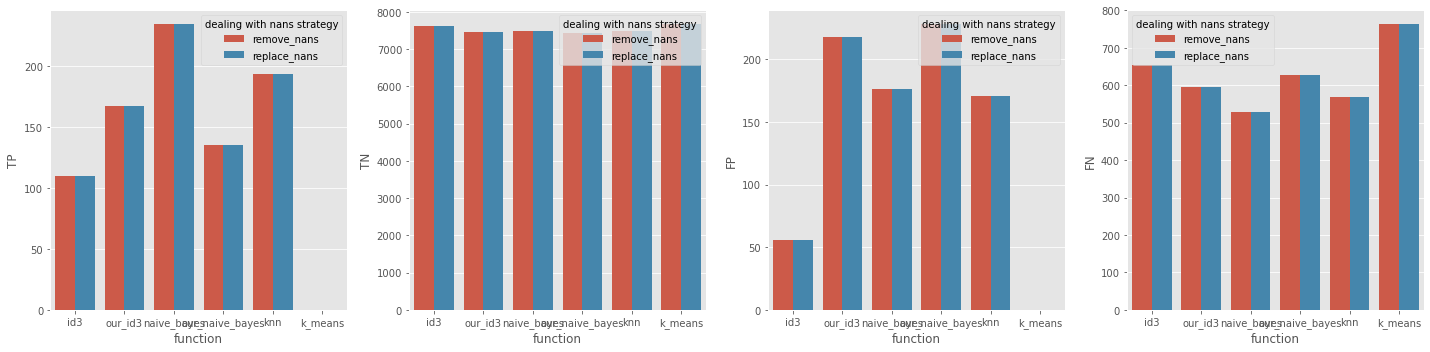

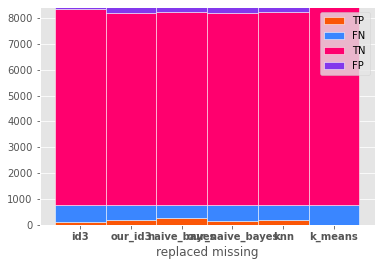

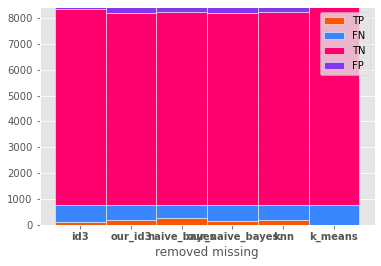

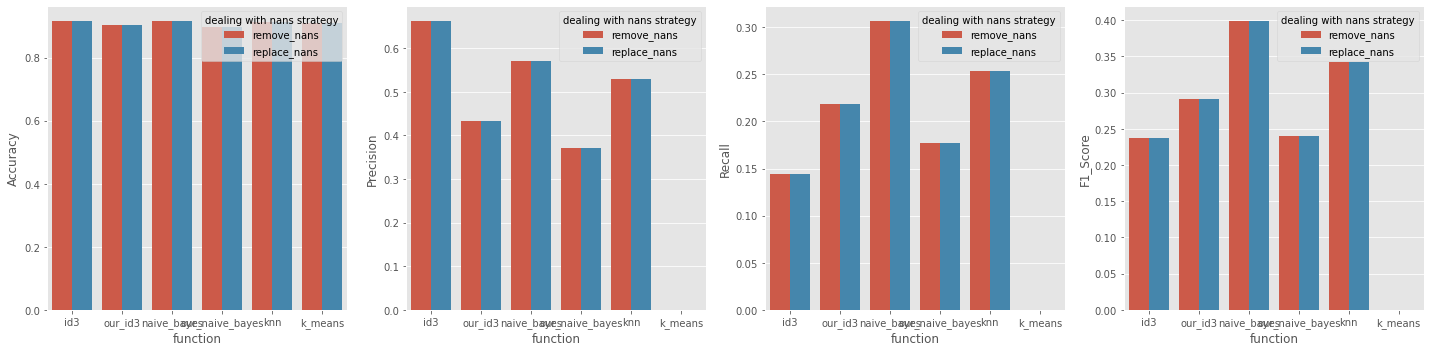

In [4]:
data_of_remove = missing_values[missing_values['dealing with nans strategy']=='remove_nans']
data_of_replace = missing_values[missing_values['dealing with nans strategy']=='replace_nans']

# Accuracy = TP+TN/TP+FP+FN+TN
Accuracy_remove = (data_of_remove['TP'] + data_of_remove['TN'] )/\
        (data_of_remove['TP'] + data_of_remove['TN'] + data_of_remove['FP'] + data_of_remove['FN'])
Accuracy_replace = (data_of_replace['TP'] + data_of_replace['TN']) /\
        (data_of_replace['TP'] + data_of_replace['TN'] + data_of_replace['FP'] + data_of_replace['FN'])

# Precision = TP/TP+FP
Precision_remove = data_of_remove['TP'] / (data_of_remove['TP'] + data_of_remove['FP'])
Precision_replace = data_of_replace['TP'] / (data_of_replace['TP'] + data_of_replace['FP'])

# Recall = TP/TP+FN
Recall_remove = data_of_remove['TP'] / (data_of_remove['TP'] + data_of_remove['FN'])
Recall_replace = data_of_replace['TP'] / (data_of_replace['TP'] + data_of_replace['FN'])

# F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_score_remove = 2 * (Recall_remove * Precision_remove) / (Recall_remove + Precision_remove)
F1_score_replace = 2 * (Recall_replace * Precision_replace) / (Recall_replace + Precision_replace)

missing_values.loc[missing_values ['dealing with nans strategy'] =='remove_nans', 'Accuracy'] = Accuracy_remove
missing_values.loc[missing_values ['dealing with nans strategy'] == 'replace_nans', 'Accuracy'] = Accuracy_replace
missing_values.loc[missing_values ['dealing with nans strategy'] =='remove_nans', 'Precision'] = Precision_remove
missing_values.loc[missing_values ['dealing with nans strategy'] == 'replace_nans', 'Precision'] = Precision_replace
missing_values.loc[missing_values ['dealing with nans strategy'] =='remove_nans', 'Recall'] = Recall_remove
missing_values.loc[missing_values ['dealing with nans strategy'] == 'replace_nans', 'Recall'] = Recall_replace
missing_values.loc[missing_values ['dealing with nans strategy'] =='remove_nans',  'F1_Score'] = F1_score_remove
missing_values.loc[missing_values ['dealing with nans strategy'] == 'replace_nans', 'F1_Score'] = F1_score_replace

# ploting matix
fig, axes = plt.subplots(1,4,figsize=(20, 5)) 
for i,col in enumerate(['TP','TN','FP','FN']):
    sns.barplot(x="function", y=col, hue="dealing with nans strategy", data=missing_values , ax = axes[i])   
fig.tight_layout()
plt.show()

# Values of each group
columns = ['TP','FP','TN','FN']
values = missing_values[missing_values['dealing with nans strategy']=='replace_nans'][columns]
bars1 = values['TP'].to_list()
bars2 = values['FN'].to_list()
bars3 = values['TN'].to_list()
bars4 = values['FP'].to_list()

# Heights of bars1 + bars2
bars_h1 = np.add(bars1, bars2).tolist()
bars_h2 = np.add(bars_h1, bars3).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = missing_values[missing_values['dealing with nans strategy']=='remove_nans']['function'].to_list()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#fb5607', edgecolor='white', width=barWidth, label='TP')
# Create green bars (middle1), on top of the second ones
plt.bar(r, bars2, bottom=bars1, color='#3a86ff', edgecolor='white', width=barWidth, label='FN')
# Create green bars (middle2), on top of the two first
plt.bar(r, bars3, bottom=bars_h1, color='#ff006e', edgecolor='white', width=barWidth, label='TN')
# Create green bars (top)
plt.bar(r, bars4, bottom=bars_h2, color='#8338ec', edgecolor='white', width=barWidth, label='FP')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("replaced missing")
 
# Show graphic
fig.tight_layout()
plt.legend()
plt.show()

 
# Values of each group
columns = ['TP','FP','TN','FN']
values = missing_values[missing_values['dealing with nans strategy']=='replace_nans'][columns]
bars1 = values['TP'].to_list()
bars2 = values['FN'].to_list()
bars3 = values['TN'].to_list()
bars4 = values['FP'].to_list()

# Heights of bars1 + bars2
bars_h1 = np.add(bars1, bars2).tolist()
bars_h2 = np.add(bars_h1, bars3).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5]
 
# Names of group and bar width
names = missing_values[missing_values['dealing with nans strategy']=='replace_nans']['function'].to_list()
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#fb5607', edgecolor='white', width=barWidth, label='TP')
# Create green bars (middle1), on top of the second ones
plt.bar(r, bars2, bottom=bars1, color='#3a86ff', edgecolor='white', width=barWidth, label='FN')
# Create green bars (middle2), on top of the two first
plt.bar(r, bars3, bottom=bars_h1, color='#ff006e', edgecolor='white', width=barWidth, label='TN')
# Create green bars (top)
plt.bar(r, bars4, bottom=bars_h2, color='#8338ec', edgecolor='white', width=barWidth, label='FP')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("removed missing")
 
# Show graphic
fig.tight_layout()
plt.legend()
plt.show()


# ploting scores:
fig, axes = plt.subplots(1,4,figsize=(20, 5)) 
for i,col in enumerate(['Accuracy','Precision','Recall','F1_Score']):
    sns.barplot(x="function", y=col, hue="dealing with nans strategy", data=missing_values , ax = axes[i])  
fig.tight_layout()
plt.show()


Test conclusions:  
* The impact of the method to deal with missing values is very unnoticable. This was expected due to the fact that there is very little missing data.